In [1]:
#pip install -U scikit-learn
#pip install seaborn

# Exploratory Data Analysis Starter

## Import packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)


## Loading data with Pandas

In [3]:
test_df = pd.read_csv('data/t2-testresults-cl.csv')

---

# Sub-Task 1: EDA functions

In [4]:
# Output regulators:
display_plot = False
display_print = True

def plot_distribution_divided_by_churn(dataframe, column_name):
    # Create a new DataFrame with 'column_name' and 'churn' columns
    data_to_plot = dataframe[[column_name, 'churn']]

    # Filter the data for rows where 'churn' is 1 (churned customers)
    churned_data = data_to_plot[data_to_plot['churn'] == 1]

    # Filter the data for rows where 'churn' is 0 (non-churned customers)
    non_churned_data = data_to_plot[data_to_plot['churn'] == 0]

    # Create a single plot for both churned and non-churned customers
    plt.figure(figsize=(10, 6))

    # Plot the distribution of the column for churned customers in red
    sns.histplot(churned_data[column_name], kde=True, color='red', label='Churned')

    # Plot the distribution of the column for non-churned customers in blue
    sns.histplot(non_churned_data[column_name], kde=True, color='blue', label='Non-Churned')

    plt.title(f'Distribution of {column_name} by Churn')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.show()

# PLOTS
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

# PLOTS and EDA over specified dataset and column
def stats_unique_values(data, column_name):
  column_rows = len(data[column_name])
  unique_values_count = len(data[column_name].unique())
  # Unique values
  if display_print == True:
      print(f"Column: {column_name} has {unique_values_count} unique values in {column_rows} rows\n")

  #Note, adjust data theshold, now is 500

  # FOR LOW VOLUME DATA
  if unique_values_count < 300:
      # extract data
      value_counts = data[column_name].value_counts().sort_values(ascending=False)
      max_value_length = max(len(str(value)) for value in value_counts.index)
      total_count = value_counts.sum()
      for value, count in value_counts.items():
          percentage = (count / total_count) * 100
          if display_print == True:
              print(f'{value:{max_value_length}}  {count} ({percentage:.2f}%)')
      if display_print == True:
          print("")
      # Display plot
      if display_plot == True:
          if pd.api.types.is_numeric_dtype(data[column_name]):
              plot_continuous_distribution(data , column_name)
          else:
              plot_categorical_distribution(data , column_name)
  # FOR HIGH VOLUME DATA
  else:
      random_numbers = [random.randint(0, unique_values_count-1) for _ in range(5)]
      if display_print == True:
          print("Samples:")
      for num in random_numbers:
          if display_print == True:
              print(data[column_name][num])
      if pd.api.types.is_numeric_dtype(data[column_name]):
          column_stats = data[column_name].describe()
          # Extract and print specific statistics
          mean = column_stats['mean']
          std = column_stats['std']
          min_value = column_stats['min']
          quartile_25 = column_stats['25%']
          median = column_stats['50%']
          quartile_75 = column_stats['75%']
          max_value = column_stats['max']
          if display_print == True:
              print(f"\nDescription:")
              print(f"mean:{mean}")
              print(f"std: {std}")
              print(f"min: {min_value}")
              print(f"25%: {quartile_25}")
              print(f"50%: {median}")
              print(f"75%: {quartile_75}")
              print(f"max: {max_value}")
      else:
          if display_print == True:
              print("\nThe column is not numeric.")
  if display_print == True:
      print(f"\nName: {column_name}, dtype: {data[column_name].dtype}")

  print(f"\n\n\n ---------------------------------------------")


# UNIQUES
def return_unique_values(df_aq, column_name):
    return df_aq[column_name].unique()

# GET COLUMN NAMES
def return_column_names(df_aq):
    return df_aq.columns

In [5]:
def value_extraction_numbers(adf, column_name):
    # Initialize variables to store the sum and count of non-zero values
    total_sum = 0
    count_not_zero = 0
    count_zero = 0
    list_gas_12_m = []

    # Iterate through each row
    for index, row in adf.iterrows():
        if row[column_name] == 0:
            count_zero= count_zero+1
            continue  # Skip rows where the value is 0
        #print(row[column_name])
        total_sum += row[column_name]
        count_not_zero += 1
        list_gas_12_m.append(row[column_name])
        
    print(f'Total Sum: {total_sum}')
    print(f'Mean: {total_sum/(count_not_zero+count_zero)}')
    print(f'Mean (excluding zeros): {total_sum/count_not_zero}')
    print(f'count NotZero: {count_not_zero}')
    print(f'count Zero: {count_zero}')

    count_zero

    # Step 1: Count unique values
    unique_values_count = len(set(list_gas_12_m))

    # Step 2: Create a distribution plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.histplot(list_gas_12_m, kde=True, color="skyblue")
    plt.title(f"{column_name} Distribution\nUnique Values: {unique_values_count}")
    plt.xlabel(f"{column_name}")
    plt.ylabel("Frequency")
    plt.show()

---

# Client Data EDA

In [6]:
test_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,PERCENTAGE_VARIABLE_price_peak,PERCENTAGE_VARIABLE_price_mid_peak,PERCENTAGE_FIXED_price_off_peak,PERCENTAGE_FIXED_price_peak,PERCENTAGE_FIXED_price_mid_peak,AVG_VARIABLE,AVG_FIXED,PCTG_AVG_VARIABLE,PCTG_AVG_FIXED,churn
0,0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,...,-3.938890,-0.073198,0.0,0.0,0.0,0.100497,27.15259,-3.461511,0.0,0.0
1,0004351ebdd665e6ee664792efc4fd13,MISSING,4060,0,0,2009-08-06,2016-06-21,2013-06-21,2015-06-23,597.77,...,0.000000,0.000000,0.0,0.0,0.0,0.146174,44.44471,-3.006637,0.0,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,usilxuppasemubllopkaafesmlibmsdf,7440,0,1062,2013-02-25,2016-05-05,2015-05-05,2015-02-26,1311.16,...,0.000000,0.000000,0.0,0.0,0.0,0.203511,45.94471,-2.168736,0.0,0.0
3,00114d74e963e47177db89bc70108537,ewpakwlliwisiwduibdlfmalxowmwpci,11272,0,0,2010-03-02,2016-03-02,2010-03-02,2015-03-09,1671.41,...,0.000000,0.000000,0.0,0.0,0.0,0.147671,44.26693,-2.976611,0.0,0.0
4,0013f326a839a2f6ad87a1859952d227,foosdfpfkusacimwkcsosbicdxkicaua,267414,0,19394,2013-02-22,2016-02-22,2014-10-07,2015-02-26,3077.34,...,-3.875184,-0.071510,0.0,0.0,0.0,0.102237,27.15259,-3.411224,0.0,0.0


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  14606 non-null  object 
 1   channel_sales                       14606 non-null  object 
 2   cons_12m                            14606 non-null  int64  
 3   cons_gas_12m                        14606 non-null  int64  
 4   cons_last_month                     14606 non-null  int64  
 5   date_activ                          14606 non-null  object 
 6   date_end                            14606 non-null  object 
 7   date_modif_prod                     14606 non-null  object 
 8   date_renewal                        14606 non-null  object 
 9   forecast_cons_12m                   14606 non-null  float64
 10  forecast_cons_year                  14606 non-null  int64  
 11  forecast_discount_energy            14606

In [8]:
test_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,PERCENTAGE_VARIABLE_price_peak,PERCENTAGE_VARIABLE_price_mid_peak,PERCENTAGE_FIXED_price_off_peak,PERCENTAGE_FIXED_price_peak,PERCENTAGE_FIXED_price_mid_peak,AVG_VARIABLE,AVG_FIXED,PCTG_AVG_VARIABLE,PCTG_AVG_FIXED,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14605.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,...,-1.000604,0.489040,0.399680,0.118142,0.155409,0.127589,37.682584,1.433501,0.469442,0.097159
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,...,4.378553,5.024518,1.660639,0.499112,0.981671,0.027564,8.993085,264.456623,1.398258,0.296184
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-38.673506,-28.488897,-30.893943,-32.762367,-2.977690,0.000000,0.000000,-49.693438,-30.643306,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,-3.546347,0.000000,0.000000,0.000000,0.000000,0.100497,27.152590,-3.461523,0.000000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.129449,44.266930,-2.915425,0.000000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,...,0.000000,0.000000,0.401609,0.000000,0.000000,0.148499,44.444710,-1.997442,0.401609,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,...,73.688336,525.929574,34.286950,3.140651,95.476851,0.278469,59.444710,18448.666667,34.286950,1.000000


In [9]:
# Get Column names
column_names = return_column_names(test_df)
print(column_names)

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'VARIABLE_price_off_peak', 'VARIABLE_price_peak',
       'VARIABLE_price_mid_peak', 'FIXED_price_off_peak', 'FIXED_price_peak',
       'FIXED_price_mid_peak', 'PERCENTAGE_VARIABLE_price_off_peak',
       'PERCENTAGE_VARIABLE_price_peak', 'PERCENTAGE_VARIABLE_price_mid_peak',
       'PERCENTAGE_FIXED_price_off_peak', 'PERCENTAGE_FIXED_price_peak',
       'PERCENTAGE_FIXED_price_mid_peak', 'AVG_VARIABLE', 'AVG_FIXED',
       'PCTG_AVG_VARIABLE', 'PCTG_AVG_FIXED', 'churn'],
   

## Churn

In [10]:
stats_unique_values(test_df,'churn')

Column: churn has 3 unique values in 14606 rows

0.0  13186 (90.28%)
1.0  1419 (9.72%)


Name: churn, dtype: float64



 ---------------------------------------------


In [11]:
def analyze_price_and_get_ranges(column):
    statistics = column.describe(percentiles=[.2, .4, .6, .8])

    print("Mean:", statistics['mean'])
    print("Standard Deviation:", statistics['std'])
    print("\nmin:", statistics['min'])
    print("20%:", statistics['20%'])
    print("40%:", statistics['40%'])
    print("60%:", statistics['60%'])
    print("80%:", statistics['80%'])
    print("Max:", statistics['max'])

    min_value = statistics['min']
    percentile_20 = statistics['20%']
    percentile_40 = statistics['40%']
    percentile_60 = statistics['60%']
    percentile_80 = statistics['80%']
    max_value = statistics['max']

    range_0_20 = [min_value, percentile_20]
    range_20_40 = [percentile_20, percentile_40]
    range_40_60 = [percentile_40, percentile_60]
    range_60_80 = [percentile_60, percentile_80]
    range_80_100= [percentile_80, max_value]

    return range_0_20, range_20_40, range_40_60, range_60_80, range_80_100


def calculate_stats_for_positive_negative(df_column):
    # Extract negative and positive values
    negative_values = df_column[df_column < 0].tolist()
    neutral_values = df_column[df_column == 0].tolist()
    positive_values = df_column[df_column > 0].tolist()
    #print(f' N:{len(negative_values)} - Z:{len(neutral_values)} - P:{len(positive_values)}')

    # Calculate average, maximum, and minimum for negative values
    if negative_values:
        average_negative = sum(negative_values) / len(negative_values)
        max_negative = max(negative_values)
        min_negative = min(negative_values)
    else:
        average_negative = max_negative = min_negative = None

    # Calculate average, maximum, and minimum for positive values
    if positive_values:
        average_positive = sum(positive_values) / len(positive_values)
        max_positive = max(positive_values)
        min_positive = min(positive_values)
    else:
        average_positive = max_positive = min_positive = None

    min_value = min_negative
    percentile_20 = average_negative * 2
    percentile_40 = max_negative * 2
    percentile_60 = min_positive * 2
    percentile_80 = average_positive * 2
    max_value = max_positive


    print("\nmin:", min_value)
    print("20%:", percentile_20)
    print("40%:", percentile_40)
    print("60%:", percentile_60)
    print("80%:", percentile_80)
    print("Max:", max_value)

    range_0_20 = [min_value, percentile_20]
    range_20_40 = [percentile_20, percentile_40]
    range_40_60 = [percentile_40, percentile_60]
    range_60_80 = [percentile_60, percentile_80]
    range_80_100= [percentile_80, max_value]

    return range_0_20, range_20_40, range_40_60, range_60_80, range_80_100

## AVG_VARIABLE

Mean: 0.12758858247295626
Standard Deviation: 0.02756443734320346

min: 0.0
20%: 0.1000279999999999
40%: 0.1248887499999999
60%: 0.146588
80%: 0.149251
Max: 0.2784689999999999


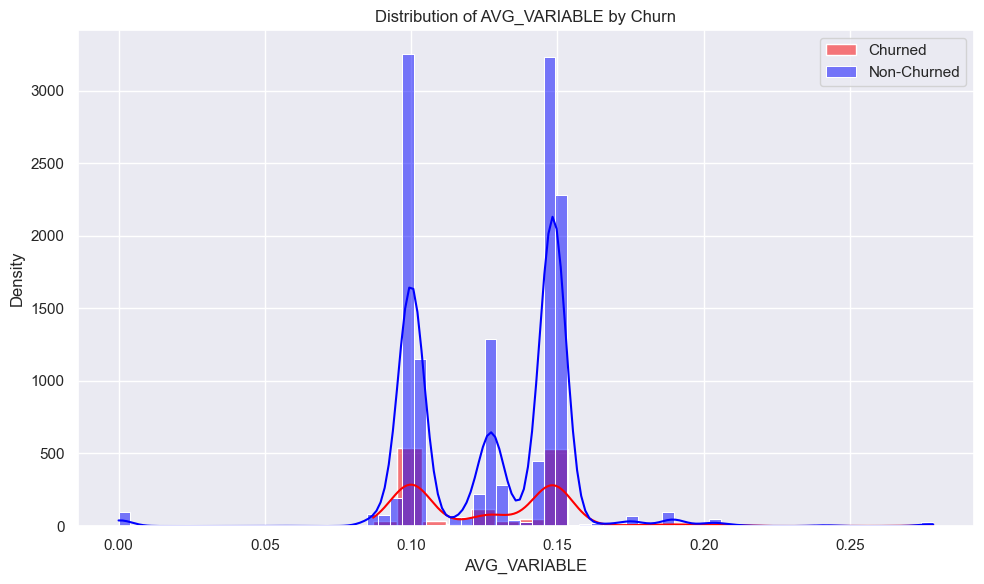

In [12]:
AVG_VARIABLE_ranges = analyze_price_and_get_ranges(test_df['AVG_VARIABLE'])
plot_distribution_divided_by_churn(test_df,'AVG_VARIABLE')

## AVG_FIXED

Mean: 37.6825838963741
Standard Deviation: 8.99308543799025

min: 0.0
20%: 27.15259
40%: 44.26692996
60%: 44.35581996
80%: 44.44470996
Max: 59.44470996


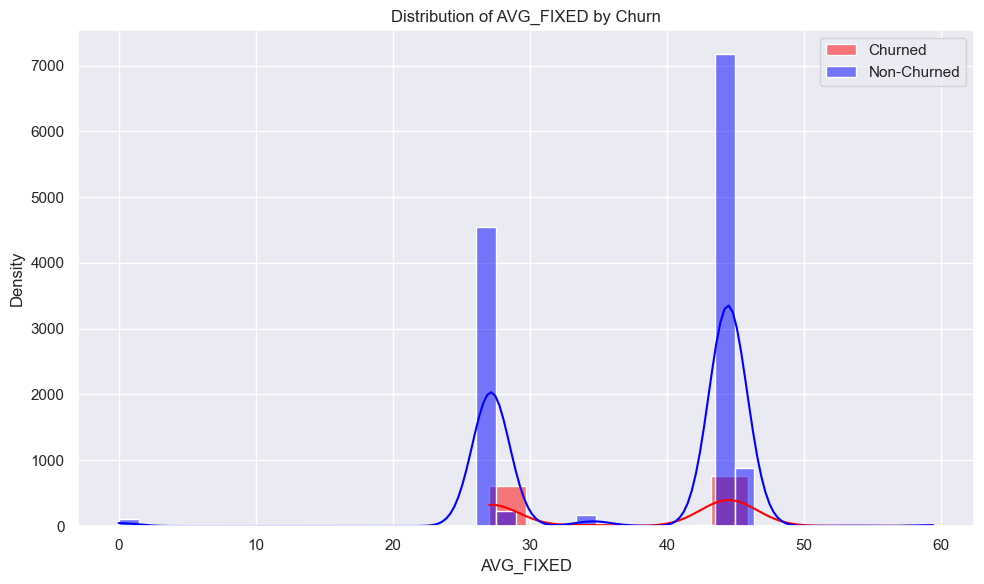

In [13]:
AVG_FIXED_ranges = analyze_price_and_get_ranges(test_df['AVG_FIXED'])
plot_distribution_divided_by_churn(test_df,'AVG_FIXED')

## PCTG_AVG_VARIABLE

In [14]:
# Example usage:
PCTG_AVG_VARIABLE_ranges = calculate_stats_for_positive_negative(test_df['PCTG_AVG_VARIABLE'])
print("")
print(PCTG_AVG_VARIABLE_ranges)


min: -49.69343796364157
20%: -6.153479690551144
40%: -0.0375495966733646
60%: 0.023185128046642
80%: 119.48937105720766
Max: 18448.666666666668

([-49.69343796364157, -6.153479690551144], [-6.153479690551144, -0.0375495966733646], [-0.0375495966733646, 0.023185128046642], [0.023185128046642, 119.48937105720766], [119.48937105720766, 18448.666666666668])


## PCTG_AVG_FIXED

In [15]:
#stats_unique_values(test_df,'PCTG_AVG_FIXED')
PCTG_AVG_FIXED_ranges = calculate_stats_for_positive_negative(test_df['PCTG_AVG_FIXED'])
print("")
print(PCTG_AVG_FIXED_ranges)


min: -30.643306313139245
20%: -4.864073820371664
40%: -5.244648521756445e-06
60%: 2.000359669972727e-05
80%: 2.202769272659228
Max: 34.286949679399

([-30.643306313139245, -4.864073820371664], [-4.864073820371664, -5.244648521756445e-06], [-5.244648521756445e-06, 2.000359669972727e-05], [2.000359669972727e-05, 2.202769272659228], [2.202769272659228, 34.286949679399])


---

# Hypotesis Testing

In [16]:
""" 
AVG_VARIABLE_ranges
AVG_FIXED_ranges
PCTG_AVG_VARIABLE_ranges
PCTG_AVG_FIXED_ranges
"""


def transpose_number_to_code(el, ranges):
    #R1
    range1_max = ranges[0][1]
    #R2
    range2_min = ranges[1][0]
    range2_max = ranges[1][1]
    #R3
    range3_min = ranges[2][0]
    range3_max = ranges[2][1]
    #R4
    range4_min = ranges[3][0]
    range4_max = ranges[3][1]
    #R5
    range5_min = ranges[3][0]

    if (el<range1_max):
        return 1
    elif (el>=range2_min and el<range2_max):
        return 2
    elif (el>=range3_min and el<range3_max):
        return 3
    elif (el>=range4_min and el<range4_min):
        return 4
    elif (el>=range5_min):
        return 5
    
""" 
#TESTS:
el_AVG_VARIABLE = test_df.at[0, 'AVG_VARIABLE']
el_AVG_FIXED = test_df.at[0, 'AVG_FIXED']
el_PCTG_AVG_VARIABLE = test_df.at[0, 'PCTG_AVG_VARIABLE']
el_PCTG_AVG_FIXED = test_df.at[0, 'PCTG_AVG_FIXED']

transpose_number_to_code(el_AVG_VARIABLE,AVG_VARIABLE_ranges)
transpose_number_to_code(el_AVG_FIXED,AVG_FIXED_ranges)
transpose_number_to_code(el_PCTG_AVG_VARIABLE,PCTG_AVG_VARIABLE_ranges)
transpose_number_to_code(el_PCTG_AVG_FIXED,PCTG_AVG_FIXED_ranges) 
"""

" \n#TESTS:\nel_AVG_VARIABLE = test_df.at[0, 'AVG_VARIABLE']\nel_AVG_FIXED = test_df.at[0, 'AVG_FIXED']\nel_PCTG_AVG_VARIABLE = test_df.at[0, 'PCTG_AVG_VARIABLE']\nel_PCTG_AVG_FIXED = test_df.at[0, 'PCTG_AVG_FIXED']\n\ntranspose_number_to_code(el_AVG_VARIABLE,AVG_VARIABLE_ranges)\ntranspose_number_to_code(el_AVG_FIXED,AVG_FIXED_ranges)\ntranspose_number_to_code(el_PCTG_AVG_VARIABLE,PCTG_AVG_VARIABLE_ranges)\ntranspose_number_to_code(el_PCTG_AVG_FIXED,PCTG_AVG_FIXED_ranges) \n"

In [17]:
# Create a DataFrame with 'id' and 'churn' columns
ansis = test_df[['id', 'churn']]

# Add four empty integer columns
ansis['AVG_VARIABLE'] = None
ansis['AVG_FIXED'] = None
ansis['PCTG_AVG_VARIABLE'] = None
ansis['PCTG_AVG_FIXED'] = None

# Move the 'churn' column to be the last column
churn_column = ansis.pop('churn')
ansis['churn'] = churn_column

# Define the column names and corresponding functions
column_functions = [
    ['AVG_VARIABLE', AVG_VARIABLE_ranges],
    ['AVG_FIXED', AVG_FIXED_ranges],
    ['PCTG_AVG_VARIABLE', PCTG_AVG_VARIABLE_ranges],
    ['PCTG_AVG_FIXED', PCTG_AVG_FIXED_ranges]
]

# Apply the functions to populate the columns
#for element in column_functions:
#    ansis[element[0]] = test_df[element[0]].apply(transpose_number_to_code, args=(test_df[element[0]],element[1]))
for index, row in test_df.iterrows():
    ansis.loc[ansis['id'] == row['id'], 'AVG_VARIABLE'] = transpose_number_to_code(row['AVG_VARIABLE'],AVG_VARIABLE_ranges)
    ansis.loc[ansis['id'] == row['id'], 'AVG_FIXED'] = transpose_number_to_code(row['AVG_FIXED'],AVG_FIXED_ranges)
    ansis.loc[ansis['id'] == row['id'], 'PCTG_AVG_VARIABLE'] = transpose_number_to_code(row['PCTG_AVG_VARIABLE'],PCTG_AVG_VARIABLE_ranges)
    ansis.loc[ansis['id'] == row['id'], 'PCTG_AVG_FIXED'] = transpose_number_to_code(row['PCTG_AVG_FIXED'],PCTG_AVG_FIXED_ranges)


print(ansis)

/var/folders/9t/0lsqdy6j1w532t1t30stgyz40000gp/T/ipykernel_9414/3832584174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ansis['AVG_VARIABLE'] = None
/var/folders/9t/0lsqdy6j1w532t1t30stgyz40000gp/T/ipykernel_9414/3832584174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ansis['AVG_FIXED'] = None
/var/folders/9t/0lsqdy6j1w532t1t30stgyz40000gp/T/ipykernel_9414/3832584174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

                                     id AVG_VARIABLE AVG_FIXED   
0      0002203ffbb812588b632b9e628cc38d            2         2  \
1      0004351ebdd665e6ee664792efc4fd13            3         5   
2      0010bcc39e42b3c2131ed2ce55246e3c            5         5   
3      00114d74e963e47177db89bc70108537            5         3   
4      0013f326a839a2f6ad87a1859952d227            2         2   
...                                 ...          ...       ...   
14601  ffebf6a979dd0b17a41076df1057e733            1         1   
14602  fffac626da707b1b5ab11e8431a4d0a2            5         5   
14603  fffc0cacd305dd51f316424bbb08d1bd            3         2   
14604  fffe4f5646aa39c7f97f95ae2679ce64            1         1   
14605  ffff7fa066f1fb305ae285bb03bf325a            2         1   

      PCTG_AVG_VARIABLE PCTG_AVG_FIXED  churn  
0                     2              3    0.0  
1                     2              3    0.0  
2                     2              3    0.0  
3              

In [18]:
ansis.to_csv('data/t2-ansis.csv', sep=",", index=False)    

---

# ANSIS_df

In [19]:
adf = pd.read_csv('data/t2-ansis.csv')
adf.info()
adf_zero = adf[adf['churn'] == 0]
adf_uno = adf[adf['churn'] == 1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14606 non-null  object 
 1   AVG_VARIABLE       14606 non-null  int64  
 2   AVG_FIXED          14606 non-null  int64  
 3   PCTG_AVG_VARIABLE  14606 non-null  int64  
 4   PCTG_AVG_FIXED     14606 non-null  int64  
 5   churn              14605 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 684.8+ KB


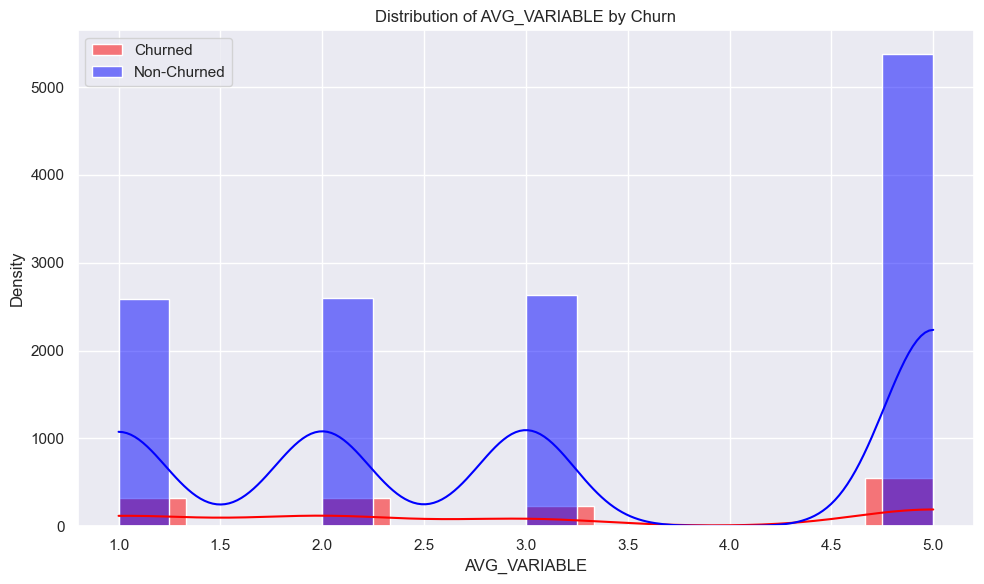

In [20]:
# AVG_VARIABLE
plot_distribution_divided_by_churn(adf,'AVG_VARIABLE')

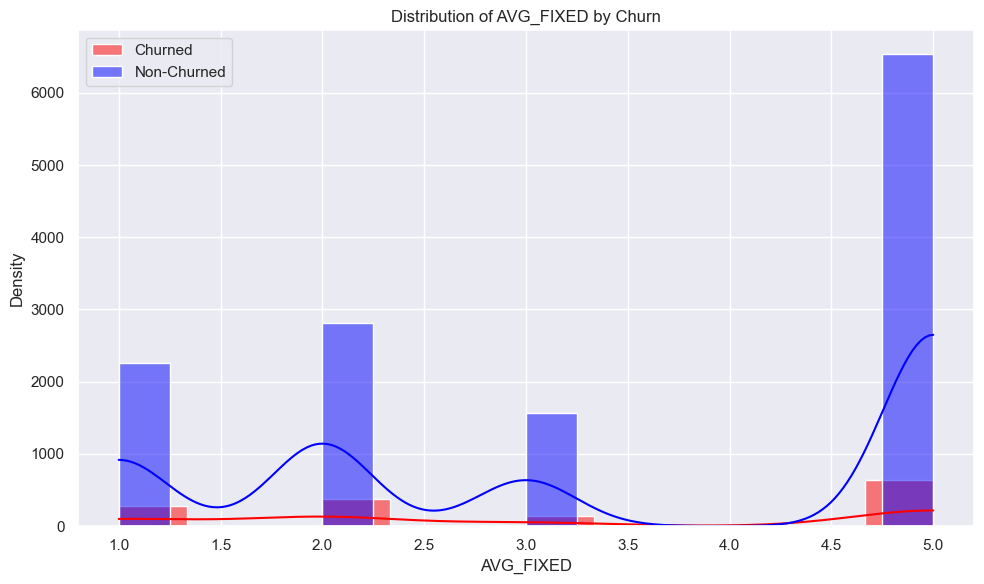

In [21]:
# AVG_VARIABLE
plot_distribution_divided_by_churn(adf,'AVG_FIXED')

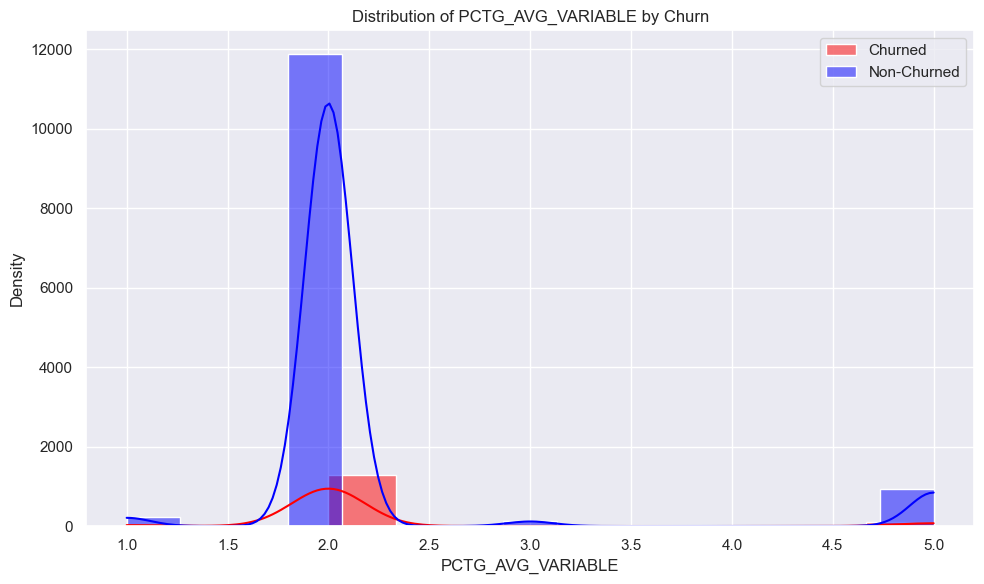

In [22]:
# PCTG_AVG_VARIABLE
plot_distribution_divided_by_churn(adf,'PCTG_AVG_VARIABLE')

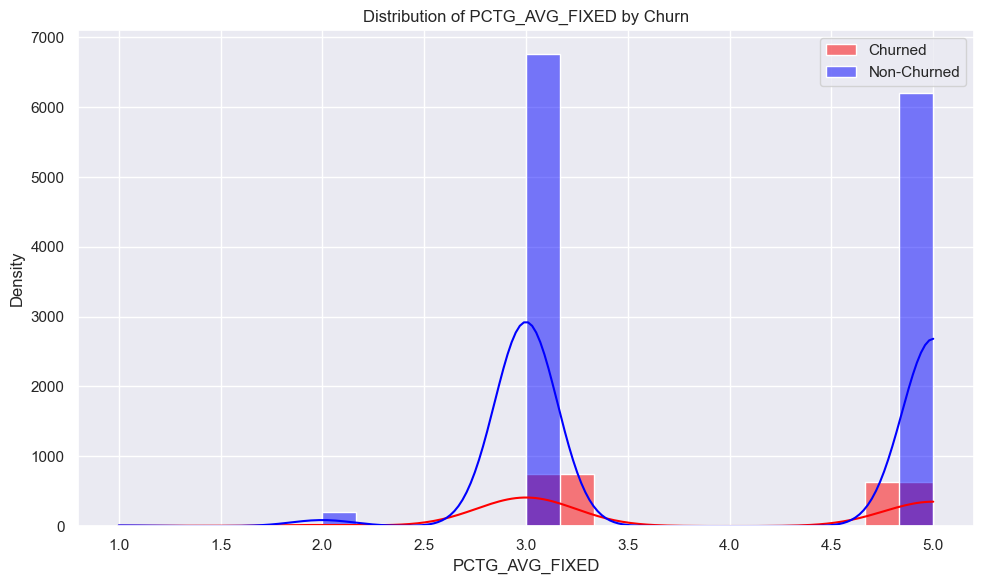

In [23]:
# PCTG_AVG_FIXED
plot_distribution_divided_by_churn(adf,'PCTG_AVG_FIXED')

## Analysis of Variance

In [24]:
import pandas as pd
import scipy.stats as stats

# Assuming you have the 'adf' DataFrame with columns 'AVG_VARIABLE', 'AVG_FIXED', 'PCTG_AVG_VARIABLE', 'PCTG_AVG_FIXED', and 'churn'

# Separate the data into two groups based on 'churn' (0 and 1)
churn_0_data = adf[adf['churn'] == 0]
churn_1_data = adf[adf['churn'] == 1]

# Define the columns for the analysis (1 to 4)
columns_for_analysis = ['AVG_VARIABLE', 'AVG_FIXED', 'PCTG_AVG_VARIABLE', 'PCTG_AVG_FIXED']

# Perform ANOVA for each column
anova_results = {}
for column in columns_for_analysis:
    anova_result = stats.f_oneway(churn_0_data[column], churn_1_data[column])
    anova_results[column] = anova_result

# Print the ANOVA results
for column, result in anova_results.items():
    print(f'ANOVA for {column}:')
    print(f'F-statistic: {result.statistic}')
    print(f'p-value: {result.pvalue}')
    print()




ANOVA for AVG_VARIABLE:
F-statistic: 10.522824431339707
p-value: 0.001181741995720891

ANOVA for AVG_FIXED:
F-statistic: 17.35142563474747
p-value: 3.124510955782945e-05

ANOVA for PCTG_AVG_VARIABLE:
F-statistic: 1.0244370887382992
p-value: 0.3114855960213444

ANOVA for PCTG_AVG_FIXED:
F-statistic: 3.2952927193602726
p-value: 0.0694992261038835



#### AVG_VARIABLE: (***)
The p-value (0.0012) is less than the common significance level, indicating strong evidence to reject the null hypothesis. This supports Hypothesis 1, suggesting that 'AVG_VARIABLE' is associated with 'churn'.

#### AVG_FIXED: (***)
The very low p-value (3.12e-05) provides strong evidence to reject the null hypothesis. This supports Hypothesis 1, indicating that 'AVG_FIXED' is significantly associated with 'churn'.

#### PCTG_AVG_VARIABLE:
The p-value (0.3115) is greater than the common significance level, suggesting a lack of strong evidence to reject the null hypothesis. This does not support either hypothesis.

#### PCTG_AVG_FIXED:
The p-value (0.0695) is above the common significance level, indicating a lack of strong evidence to reject the null hypothesis. This does not support either hypothesis.

---

In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  14606 non-null  object 
 1   channel_sales                       14606 non-null  object 
 2   cons_12m                            14606 non-null  int64  
 3   cons_gas_12m                        14606 non-null  int64  
 4   cons_last_month                     14606 non-null  int64  
 5   date_activ                          14606 non-null  object 
 6   date_end                            14606 non-null  object 
 7   date_modif_prod                     14606 non-null  object 
 8   date_renewal                        14606 non-null  object 
 9   forecast_cons_12m                   14606 non-null  float64
 10  forecast_cons_year                  14606 non-null  int64  
 11  forecast_discount_energy            14606

In [26]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14606 non-null  object 
 1   AVG_VARIABLE       14606 non-null  int64  
 2   AVG_FIXED          14606 non-null  int64  
 3   PCTG_AVG_VARIABLE  14606 non-null  int64  
 4   PCTG_AVG_FIXED     14606 non-null  int64  
 5   churn              14605 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 684.8+ KB


In [27]:
# Step 1: Remove 'churn' column from the adf dataset
adf = adf.drop(columns=['churn'])

# Step 2: Remove specified columns from test_df
columns_to_remove = ["AVG_VARIABLE", "AVG_FIXED", "PCTG_AVG_VARIABLE", "PCTG_AVG_FIXED"]
test_df = test_df.drop(columns=columns_to_remove)

# Step 3: Merge test_df and adf based on 'id'
merged_df = test_df.merge(adf, on='id', how='left')

# Step 4: Move the 'churn' column to the last position
churn_column = merged_df.pop('churn')
merged_df['churn'] = churn_column

# Save the merged dataset to a CSV file
merged_df.to_csv('data/t3-merged.csv', index=False)